# 퍼셉트론에서 신경망으로
- 장점 : 퍼셉트론으로 복잡한 함수도 구현 가능
- 단점 : 가중치를 설정 하는 작업을 여전히 사람이 해줘야 함
- 신경망은 위 단점을 해결 
- 신경망의 학습 --> 가중치 찾기

## 신경망의 예

<img src='./images/fig 3-1.png' width=300>

- 입력층 : 가장 왼쪽 줄 (0층)
- 은닉층 : 중간 줄, 사람 눈에는 보이지 않음 (1층)
- 출력층 : 맨 오른쪽 줄 (2층)
- 위 예시는, 2층 신경망, 입력층은 가중치를 가지지 않기 때문

## 퍼셉트론 복습

<img src='./images/fig 3-2.png' width=200>

- $x_1$과 $x_2$ 라는 두 신호를 받아 $y$ 출력 하는 퍼셉트론

<img src='./images/e 3.1.png' width=300>

- $b$는 편향, 뉴런이 얼마나 쉽게 활성화 되는가
- $w_1$과 $w_2$는 가중치, 각 신호의 영향력 제어

<img src='./images/fig 3-3.png' width=200>

- 편향을 추가한 퍼셉트론 도식

<img src='./images/e 3.2.png' width=200>

<img src='./images/e 3.3.png' width=200>

- 입력 신호의 총합은 $h(x)$ 라는 함수를 거쳐 변환
- $h(x)$는 입력이 0을 넘으면 1, 그렇지 않으면 0 출력

## 활성화 함수의 등장

- 활성화 함수 : $h(x)$와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수
- 다음 2단계로 처리
<img src='./images/e 3.4.png' width=200>

<img src='./images/e 3.5.png' width=100>

- 기존 뉴런의 원 안에 활성함수 처리 과정 명시
- 신호 처리 결과가 $a$ 라는 노드
- 활성 함수 $h()$ 통과 하여 $y$ 노드로 변환

<img src='./images/fig 3-4.png' width=200>

- 왼쪽은 일반적인 뉴런, 오른쪽은 활성화 처리 과정을 명시한 뉴런

<img src='./images/fig 3-5.png' width=550>

# 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 *계단 함수(step function)* 이라 함
- 퍼셉트론에서는 활성화 함수로 계단 함수 사용 가능

## 시그모이드 함수

<img src='./images/e 3.6.png' width=200>

- $exp(-x)$는 $e^{-x}$
- $e$는 자연상수, 2.7182...

## 계단 함수 구현하기

In [2]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

- 위 코드는 실수(부동소수점)만 입력 가능
- numpy array를 받기 위해 아래와 같이 수정

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(int)

- 배열의 각 원소 각각에 부등호 연산을 수행한 bool 배열 생성

In [4]:
import numpy as np

nums = np.random.normal(size=10)
nums

array([-0.01702498, -0.03275058,  2.54223269, -1.04968043,  1.19033236,
        1.85960533,  1.96913294,  0.71958521, -0.04775415, -0.50018774])

In [24]:
step_function(nums)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

## 계단 함수의 그래프

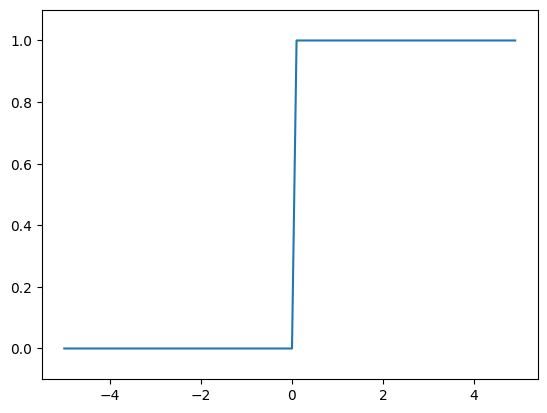

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    y = x>0
    return y.astype(int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수 구현하기

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

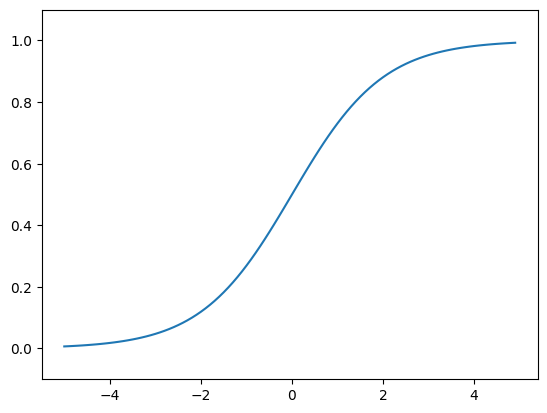

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수와 계단 함수 비교

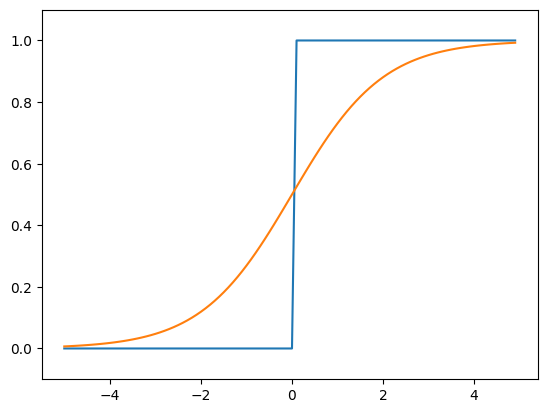

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드는 미분 가능
- 둘다 0과 1 사이
- 입력이 크면 출력도 큰 값
- 둘다 비선형

## 비선형 함수

- 선형
    - $f(x) = ax+b$
    - 직선으로 표현
    
- 신경망은 비선형을 사용해야 함
- 선형을 사용하면 아무리 깊계 해도 '은닉층이 없는 네트워크'와 동일
    - $h(x) = cx$ 를 사용한 3층 네트워크 
    - $y(x) = h(h(h(x)))$ 
    - $y(x) = c*c*c*x$ 처럼 곱셈을 세번 한 것
    - $a = c^3$과 동일
- 즉 은닉층이 없는 네트워크

## ReLU  함수

<img src='./images/e 3.7.png' width=200>
- 입력이 0이 넘으면 그 입력 그대로, 0 이하면 0을 출력 하는 함수
- 오래전 부터 사용된 시그모이드 대신으로 주로 사용

In [34]:
def relu(x):
    return np.maximum(0, x)

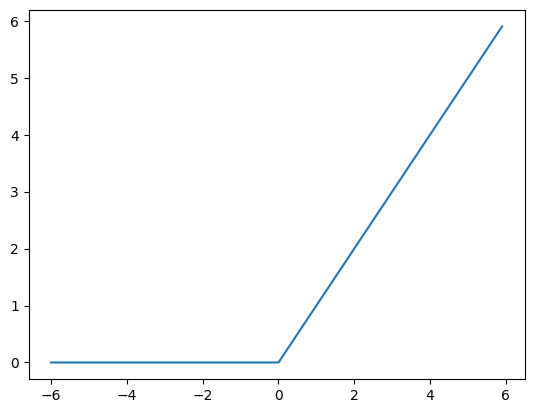

In [36]:
x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.show()

# 다차원 배열의 계산

## 다차원 배열
- 다차원 배열도 그 기본은 '숫자의 집합'

In [37]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [38]:
np.ndim(A)

1

In [39]:
A.shape

(4,)

In [40]:
A.shape[0]

4

- 차원수는 np.ndim() 으로 확인
- 형상은 shape 변수 사용 (튜플 형태임)

- 3x2 배열
- 2차원, 행렬 

In [41]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [42]:
np.ndim(B)

2

In [43]:
B.shape

(3, 2)

<img src='./images/fig 3-10.png' width=200>

## 행렬의 곱

<img src='./images/fig 3-11.png' width=500>

In [44]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [45]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

- np.dot() 함수로 행렬곱 계산
- np.dot(A, B)와 np.dot(B, A)는 다를 수 있다.

- shape에 주의 해야 함

In [5]:
A = np.array([[1, 2, 3],[4, 5, 6]])
B = np.array([[1, 2],[3, 4], [5, 6]])
C = np.array([[1, 2,], [3, 4]])

In [8]:
A.shape, B.shape, C.shape

((2, 3), (3, 2), (2, 2))

In [9]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [6]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

- 행렬의 곱에서는 대응하는 차원의 원소수를 매칭 시켜야

<img src='./images/fig 3-12.png' width=300>

- A가 2차원 행렬, B가 1차원 배열일 떄도 대응하는 차원의 원소수 일치 시켜야

In [10]:
A = np.array([[1, 2],[3, 4], [5, 6]])
B = np.array([7, 8])
A.shape, B.shape

((3, 2), (2,))

In [11]:
np.dot(A, B)

array([23, 53, 83])

<img src='./images/fig 3-13.png' width=300>

## 신경망에서의 행렬 곱

- 행렬의 곱으로 신경망의 계산 수행

<img src='./images/fig 3-14.png' width=500>

In [12]:
X = np.array([1, 2])
X.shape

(2,)

In [13]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [14]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

In [15]:
Y.shape

(3,)

# 3층 신경망 구현하기

- 3층 신경망 : 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성

<img src='./images/fig 3-15.png' width=400>

## 표기법 설명

- $w^{(1)}_{12}$, $a^{(1)}_{1}$ 과 같은 표기법

- 뉴런 $x_2$에서 다음 층 뉴런 $a^{(1)}_{1}$으로 향하는 선 위의 가중치 표시
<img src='./images/fig 3-16.png' width=400>

## 각 층의 신호 전달 구현

- 입력층에서 1층으로 신호 전달

<img src='./images/fig 3-17.png' width=400>

- 편향을 뜻하는 뉴런 ① 이 추가

<img src='./images/e 3.8.png' width=300>

- $a^{(1)}_{1}$  은 가중치를 곱한 신호 두개와 편향을 합하여 계산

<img src='./images/e 3.9.png' width=300>

- 행렬 곱을 사용한 가중치 계산 식 간소화

<img src='./images/e 3.10_2.png' width=500>

In [62]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

- 입력층에서 1층으로 신호 전달

<img src='./images/fig 3-18.png' width=400>

- $a$ : 가중치의 합
- $h()$ : 활성화 함수
- $z$ : $h()$ 로 변환한 신호

In [63]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

- 1층에서 2층으로의 신호 전달

<img src='./images/fig 3-19.png' width=400>

In [64]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

- 2층에서 출력층으로 신호 전달

<img src='./images/fig 3-20.png' width=400>

In [65]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

- 항등 함수 : 출력의 활성화 함수, 입력을 그대로 출력, 기존 구조와 동일하게 하려고 추가

## 구현 정리

- 가중치 초기화

In [66]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

- 입력 신호를 출력으로 변환 하는 과정

In [67]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)    
    
    return y

In [68]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

# 출력층 설계하기
- 신경망은 분류와 회귀 모두 사용 가능
- 문제에 따라 활성화 함수 선택
- 회귀 : 항등함수, 분류 : 소프트맥스

## 항등 함수와 소프트맥스 함수 구현하기

- 항등 함수 : 입력을 그대로 출력
<img src='./images/fig 3-21.png' width=200>

- 소프트맥스 함수
    - $exp(x)$는 $e^x$을 뜻하는 지수 함수
    - $n$은 출력층의 뉴런 수
    - $y_k$는 그중 $k$번째 출력
<img src='./images/e 3.10.png' width=200>

<img src='./images/fig 3-22.png' width=200>

In [70]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [71]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 소프트맥스 함수 구현 시 주의점

- 컴퓨터로 계산시 오버 플로우 발생 가능
- 지수 함수는 쉽게 오버 플로우 가능, 불안정 함

In [17]:
a = np.array([1010, 1000, 990])
np.exp(a)

/tmp/ipykernel_216400/1785970911.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a)


array([inf, inf, inf])

<img src='./images/e 3.11.png' width=300>

- $C$에 매우 작은 음수값을 대입하여, 오버 플로우가 나지 않도록 방지

In [18]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [19]:
np.exp(a -c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

## 소프트맥스 함수의 특징
- 출력이 0과 1사이의 실수
- 각 원소의 대소 관계는 유지 ($y = exp(x)$가 단조 증가 함수)

In [78]:
a = np.array([0.3, 2.9,4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

- 출력의 합은 1
- '확률'로 해석

In [79]:
np.sum(y)

1.0

## 출력층의 뉴런 수 정하기

- 출력층의 뉴런은 각 숫자에 대응
<img src='./images/fig 3-23.png' width=400>

# 손글씨 숫자 인식
- 학습 과정은 생략, 추론 과정만 구현
- 순전파 : 추론 과정

## MNIST 데이터셋

- MNIST는 손글씨 숫자 이미지 집합
- 0 부터 9 까지의 숫자 이미지
- 훈련 6만장, 시험 1만장
- 28x28 크기, 1채널
- 각 픽셀은 0 부터 255 까지의 값
<img src='./images/fig 3-24.png' width=400>

In [84]:
import sys, os
from dataset.mnist import load_mnist

- load_mnist 함수 옵션
    - normalize : 이미지의 픽셀 값을 0.0~1.0 사이 값으로 정규화 
    - flatten : 입력 이미지의 평탄화(1차원 배열) 
    - one_hot_label : 원 핫 인코딩 적용 여부

In [85]:
(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [88]:
from PIL import Image

In [96]:
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(np.uint8(img))
    plt.show()

3
(784,)
(28, 28)


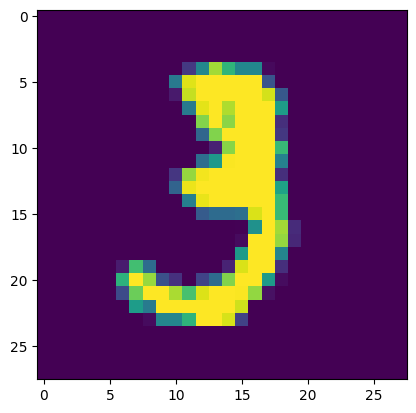

In [97]:
img = X_train[10]
label = y_train[10]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

## 신경망의 추론 처리
- 입력 뉴런 784개, 출력 뉴런 10개
- 은닉층은 두개 (각 50, 100개 뉴런)

In [104]:
import pickle

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

def init_network():
    with open("./deeplearning_from_scratch-master/ch3.신경망/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        return network
        
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)   
    
    return y

In [105]:
X, y = get_data()
network = init_network()

acc = 0
for i in range(len(X)):
    y_i = predict(network, X[i])
    p = np.argmax(y_i)
    if p == y[i]:
        acc += 1        

In [106]:
acc/len(X)

0.9352

## 배치 처리

- 신경망 각 층의 배열 형상 추이
<img src='./images/fig 3-26.png' width=500>

- 배치 처리를 위한 배열들의 형상 추이
<img src='./images/fig 3-27.png' width=500>

In [107]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [108]:
x.shape

(10000, 784)

In [109]:
x[0].shape

(784,)

In [111]:
W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

In [112]:
x, y = get_data()
network = init_network()
batch_size = 100
acc = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    acc += np.sum(p == y[i: i+batch_size])

In [113]:
acc/len(x)

0.9352

# 정리

- 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 퍼셉트론과 동일
- 다음 뉴런으로 갈 때 신호를 변화 시키는 활성 함수가 있다는 점은 차이가 있음
- 활성 함수로, 시그모이드나 ReLU, 계단 함수 사용
- 넘파이 다차원 배열을 사용 배치 처리, 신경망 구현
- 기계 학습은 회귀와 분류
- 회귀는 항등 함수, 분류는 소프트맥스를 출력층의 활성화 함수로 사용
- 분류에서는 출력층의 뉴런수를 분류하려는 클래스의 수와 동일하게
- 입력 데이터를 묶은 것을 배치, 빠르게 학습 및 추론 가능